In [96]:
import pandas as pd
import numpy as np
#Visualization
#Visualization
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
#clustering
from sklearn.cluster import KMeans
#evaluation
from sklearn import metrics

# model: source 1 (COVID-19 confirmed cases)

In [86]:
# Read previous stored dataframe
covid19_global_data_slope = pd.read_csv('covid19_global_data_slope.csv')

In [87]:
# Drop categorical values 
covid19_global_data_slope_cluster = covid19_global_data_slope.drop(['iso3_cc'], axis=1)

In [88]:
# Normalize and Nan values
covid19_global_data_slope_norm = (covid19_global_data_slope_cluster-covid19_global_data_slope_cluster.min())/(covid19_global_data_slope_cluster.max()-covid19_global_data_slope_cluster.min())
covid19_global_data_slope_norm.fillna(0,inplace=True)

## Definition

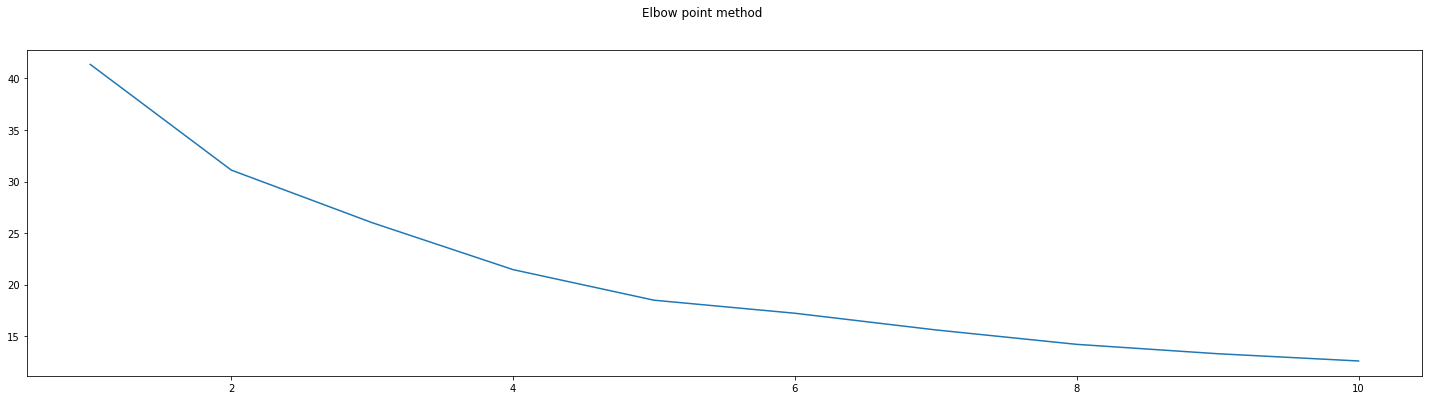

In [89]:
# plot 'elbow point'
max_clusters = 10
# calculate sse error and check elbow point
sse = []

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters = k).fit(covid19_global_data_slope_norm)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(covid19_global_data_slope_norm)
    sse.append(kmeans.inertia_)

# figure
fig, ax1 = plt.subplots(1, 1, figsize=(25,6))
fig.suptitle('Elbow point method')
ax1.plot(range(1,max_clusters+1), sse)

## Train

In [90]:
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(covid19_global_data_slope_norm)
# assign clustering labels
covid19_global_data_slope['cluster'] = kmeans.labels_

## Visualization

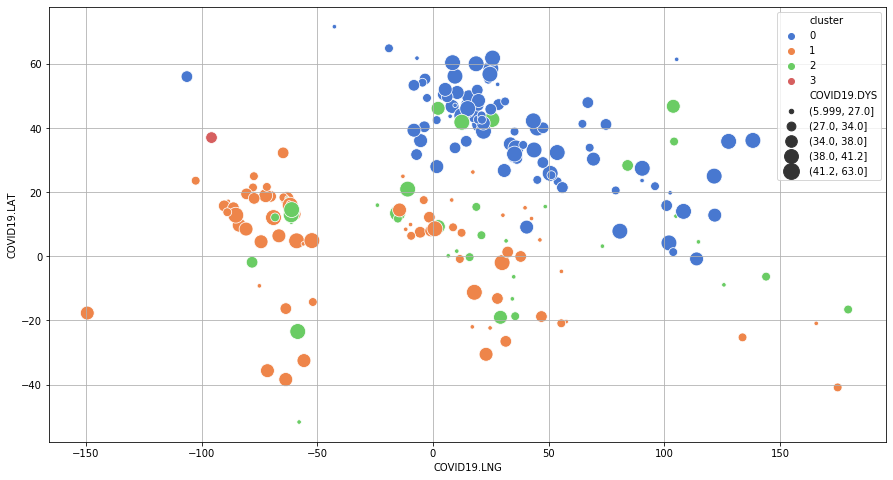

In [91]:
# scatter plot
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=covid19_global_data_slope['COVID19.LNG'], 
                y=covid19_global_data_slope['COVID19.LAT'], 
                hue=covid19_global_data_slope['cluster'],
                size=pd.qcut(covid19_global_data_slope['COVID19.DYS'],5), sizes=(250,20),
                alpha=1, palette='muted',
                ax=ax
               )
ax.grid(True)

From the picture above, countries whose latitude < 20 falls into cluster 1. At the time the virus spread, that was summer time. In the meantime, the upper side in cluster 0 was winter time, the higher the latitude colder it is.

    Note: 'COVID19.DYS' referes to time in days elapsed from the slope that represents 5%-95% of its peak value.

## Evaluation

### Silhouette Coefficient
If the ground truth labels are not known, evaluation must be performed using the model itself.

In [102]:
metrics.silhouette_score(covid19_global_data_slope_norm, covid19_global_data_slope['cluster'].values, metric='euclidean')

0.2523798297482114

According to scikit-learn documentation,


    The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

    The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


### Calinski-Harabasz Index

In [103]:
metrics.calinski_harabasz_score(covid19_global_data_slope_norm, covid19_global_data_slope['cluster'].values)

62.13394011112286

According to scikit-learn documentation,


    The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

    The score is fast to compute.


### Davies-Bouldin Index

In [104]:
metrics.davies_bouldin_score(covid19_global_data_slope_norm, covid19_global_data_slope['cluster'].values)

1.103420363912461

According to scikit-learn documentation,

    Zero is the lowest possible score. Values closer to zero indicate a better partition.

    The computation of Davies-Bouldin is simpler than that of Silhouette scores.

    The index is computed only quantities and features inherent to the dataset.


# model: source 2 (world data indicators)

In [107]:
# Read previous stored dataframe
wdi_globalind_data = pd.read_csv('wdi_globalind_data.csv')

In [108]:
# Drop categorical values 
wdi_globalind_data_cluster = wdi_globalind_data.drop(['Country Code','iso2_cc','latitude','longitude'], axis=1)

In [109]:
# Normalize and Nan values
wdi_globalind_data_norm = (wdi_globalind_data_cluster-wdi_globalind_data_cluster.min())/(wdi_globalind_data_cluster.max()-wdi_globalind_data_cluster.min())
wdi_globalind_data_norm.fillna(0,inplace=True)

## Definition

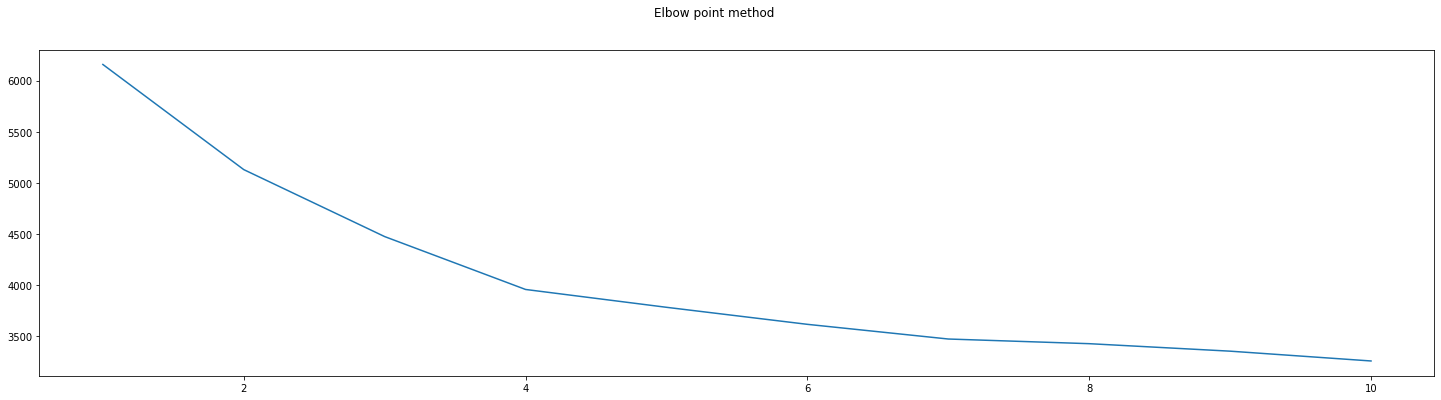

In [110]:
# plot 'elbow point'
max_clusters = 10
# calculate sse error and check elbow point
sse = []

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters = k).fit(wdi_globalind_data_norm)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(wdi_globalind_data_norm)
    sse.append(kmeans.inertia_)

# figure
fig, ax1 = plt.subplots(1, 1, figsize=(25,6))
fig.suptitle('Elbow point method')
ax1.plot(range(1,max_clusters+1), sse)

## Train

In [111]:
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wdi_globalind_data_norm)
# assign clustering labels
wdi_globalind_data['cluster'] = kmeans.labels_

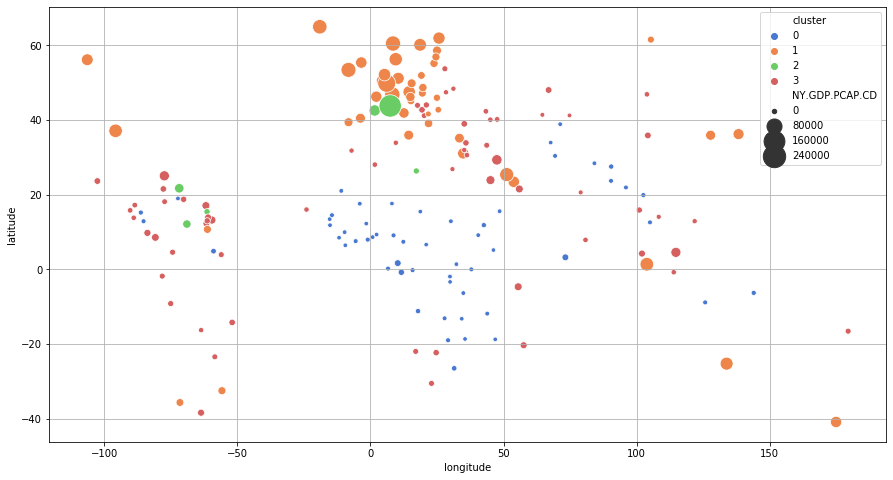

In [112]:
# scatter plot
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=wdi_globalind_data['longitude'], 
                y=wdi_globalind_data['latitude'], 
                hue=wdi_globalind_data['cluster'],
                size=wdi_globalind_data['NY.GDP.PCAP.CD'], sizes=(20,500),
                alpha=1, palette='muted',
                ax=ax
               )
ax.grid(True)

Depicted from the figure above, clustering using world data indicators shows,
- cluster 0: represents high income countries
- cluster 1: represents medium income countries
- cluster 2: represents low income countries
- cluster 3: represent high income countries, but for small populations

    Note: 'NY.GDP.PCAP.CD' represents GDP per capita in US$

## Evaluation

### Silhouette Coefficient

In [113]:
metrics.silhouette_score(wdi_globalind_data_norm, wdi_globalind_data['cluster'].values, metric='euclidean')

0.18469863121109348

### Calinski-Harabasz Index

In [114]:
metrics.calinski_harabasz_score(wdi_globalind_data_norm, wdi_globalind_data['cluster'].values)

35.00620991082762

### Davies-Bouldin Index

In [115]:
metrics.davies_bouldin_score(wdi_globalind_data_norm, wdi_globalind_data['cluster'].values)

1.8843450819578498

# model: source 1&2 (COVID-19 confirmed cases & world data indicators)

In [61]:
# Prepare data for merge
covid19_global_data_slope.drop(columns=['cluster'],inplace=True)
wdi_globalind_data.drop(columns=['iso2_cc','latitude','longitude','cluster'],inplace=True)
wdi_globalind_data.rename(columns={'Country Code':'iso3_cc'},inplace=True)

In [68]:
# merge on ISO3166 code
covid19_global_data_merge = pd.merge(covid19_global_data_slope,wdi_globalind_data, on='iso3_cc')

In [70]:
# Drop categorical values
covid19_global_data_merge_cluster = covid19_global_data_merge.drop(['iso3_cc'], axis=1)

In [71]:
# Normalize and Nan values
covid19_global_data_norm = (covid19_global_data_merge_cluster-covid19_global_data_merge_cluster.min())/(covid19_global_data_merge_cluster.max()-covid19_global_data_merge_cluster.min())
covid19_global_data_norm.fillna(0,inplace=True)

## Definition

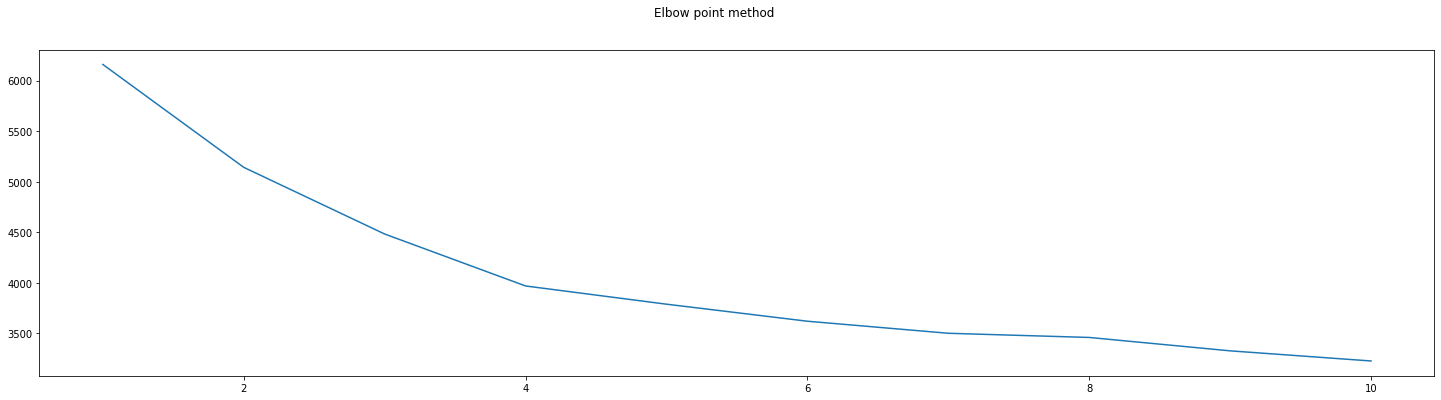

In [72]:
# plot 'elbow point'
max_clusters = 10
# calculate sse error and check elbow point
sse = []

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters = k).fit(covid19_global_data_norm)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(covid19_global_data_norm)
    sse.append(kmeans.inertia_)

# figure
fig, ax1 = plt.subplots(1, 1, figsize=(25,6))
fig.suptitle('Elbow point method')
ax1.plot(range(1,max_clusters+1), sse)

## Train

In [73]:
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(covid19_global_data_norm)
# assign clustering labels
covid19_global_data_merge['cluster'] = kmeans.labels_

## Visualization

In [78]:
# create map
map_clusters = folium.Map(location=[20,0], zoom_start=1.75, control_scale='True')

# set color scheme for the clusters
x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, area_name, cluster in zip(covid19_global_data_merge['COVID19.LAT'], 
                                        covid19_global_data_merge['COVID19.LNG'], 
                                        covid19_global_data_merge['iso3_cc'], 
                                        covid19_global_data_merge['cluster']):
    label = folium.Popup(str(area_name)+ ' Cluster ' + str(cluster), parse_html=False)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [80]:
# Print clustered countries
for num in range(kclusters):
    print('Cluster {}: {}'.format(num, covid19_global_data_merge[covid19_global_data_merge['cluster'] == num]['iso3_cc'].values))

Cluster 0: ['AFG' 'AGO' 'BDI' 'BEN' 'BFA' 'BGD' 'BTN' 'CAF' 'CIV' 'CMR' 'COG' 'DJI'
 'ETH' 'GHA' 'GIN' 'GMB' 'GNB' 'GUY' 'HND' 'HTI' 'KEN' 'KHM' 'LAO' 'LBR'
 'MDG' 'MDV' 'MLI' 'MMR' 'MOZ' 'MRT' 'MWI' 'NER' 'NGA' 'NIC' 'NPL' 'PAK'
 'PNG' 'RWA' 'SDN' 'SEN' 'SLE' 'STP' 'TCD' 'TGO' 'TLS' 'TZA' 'UGA' 'ZMB'
 'ZWE']
Cluster 1: ['ARE' 'AUS' 'AUT' 'BEL' 'BGR' 'CAN' 'CHE' 'CHL' 'CYP' 'CZE' 'DEU' 'DNK'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL' 'ISR' 'ITA'
 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MKD' 'MLT' 'NLD' 'NOR' 'NZL' 'POL' 'PRT'
 'QAT' 'ROU' 'RUS' 'SGP' 'SVK' 'SVN' 'SWE' 'URY' 'USA']
Cluster 2: ['ALB' 'ARG' 'ARM' 'ATG' 'AZE' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA'
 'BRB' 'BRN' 'BWA' 'CHN' 'COL' 'CPV' 'CRI' 'CUB' 'DOM' 'DZA' 'ECU' 'EGY'
 'GEO' 'GRD' 'GTM' 'IDN' 'IND' 'JAM' 'JOR' 'KAZ' 'KGZ' 'KWT' 'LBN' 'LCA'
 'LKA' 'MAR' 'MDA' 'MEX' 'MNE' 'MNG' 'MUS' 'MYS' 'NAM' 'OMN' 'PAN' 'PER'
 'PHL' 'PRY' 'PSE' 'SAU' 'SLV' 'SRB' 'SUR' 'SWZ' 'SYC' 'THA' 'TUN' 'TUR'
 'UKR' 'UZB' 'VCT' 'VNM' 'Z

In [81]:
# store results in csv file
covid19_global_data_merge.to_csv('covid19_global_data_merge.csv',index=False)

## Evaluation

### Silhouette Coefficient

In [116]:
metrics.silhouette_score(covid19_global_data_norm, covid19_global_data_merge['cluster'].values, metric='euclidean')

0.18166406399409651

### Calinski-Harabasz Index

In [117]:
metrics.calinski_harabasz_score(covid19_global_data_norm, covid19_global_data_merge['cluster'].values)

34.39718674591393

### Davies-Bouldin Index

In [118]:
metrics.davies_bouldin_score(covid19_global_data_norm, covid19_global_data_merge['cluster'].values)

1.8949254599982375

## Make a prediction

Results above are not quite selective, let's create our prediction cluster model.

In [120]:
covid19_global_data_cc = pd.read_csv('covid19_global_data_cc.csv')

In [129]:
# calculate number of cases per 1M population as of '5/1/20'
covid19_global_data_pred = pd.merge(covid19_global_data_cc,covid19_global_data_merge, on='iso3_cc')
cluster_pred = covid19_global_data_pred['5/1/20']/(covid19_global_data_pred['SP.POP.TOTL']/1e6)
cluster_pred.quantile([0.25,0.5,0.75])

0.25     37.858287
0.50    149.539759
0.75    937.527967
dtype: float64

In [130]:
# calculate IQR based on clusters
print('IQR (25%-75%): \nCOVID-19 cases / 1M')

for num in range(kclusters):
    _dut = covid19_global_data_pred[covid19_global_data_pred['cluster']==num]['5/1/20']/(covid19_global_data_pred[covid19_global_data_pred['cluster']==num]['SP.POP.TOTL']/1e6)
    print('Cluster {}: {:.2f} - {:.2f}'.format(num,_dut.quantile(0.25), _dut.quantile(0.75)))

IQR (25%-75%): 
COVID-19 cases / 1M
Cluster 0: 2.81 - 53.17
Cluster 1: 499.37 - 2474.94
Cluster 2: 66.04 - 321.71
Cluster 3: 59.69 - 1825.72


In [152]:
def assign_pred(row):
    rate = row['5/1/20']/(row['SP.POP.TOTL']/1e6)
    if(rate < cluster_pred.quantile(0.25)):
        pred = 0
    elif(rate < cluster_pred.quantile(0.5)):
        pred = 2
    elif(rate < cluster_pred.quantile(0.75)):
        pred = 3
    else:
        pred = 1
    return(pred)
# asign predicted cluster based on IQR calculated
covid19_global_data_pred['cluster_pred'] = covid19_global_data_pred.apply(assign_pred, axis=1)

### Evaluation

#### Adjusted Rand index,


    Random (uniform) label assignments have a ARI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Rand index or the V-measure for instance).

    Bounded range [-1, 1]: negative values are bad (independent labelings), similar clusterings have a positive ARI, 1.0 is the perfect match score.

    No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.


In [153]:
metrics.adjusted_rand_score(covid19_global_data_pred['cluster'], covid19_global_data_pred['cluster_pred'])

0.2036333359674242

#### Mutual Information based scores


    Random (uniform) label assignments have a AMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).

    Upper bound of 1: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, an AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).


In [154]:
metrics.adjusted_mutual_info_score(covid19_global_data_pred['cluster'], covid19_global_data_pred['cluster_pred'])

0.25365393887914334

#### Homogeneity, completeness and V-measure


    Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.

    Intuitive interpretation: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.

    No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.


In [155]:
metrics.homogeneity_score(covid19_global_data_pred['cluster'], covid19_global_data_pred['cluster_pred'])

0.2697939701474327

#### Contingency Matrix


    Allows to examine the spread of each true cluster across predicted clusters and vice versa.

    The contingency table calculated is typically utilized in the calculation of a similarity statistic (like the others listed in this document) between the two clusterings.


In [156]:
metrics.cluster.contingency_matrix(covid19_global_data_pred['cluster'], covid19_global_data_pred['cluster_pred'])

array([[34,  2, 13,  0],
       [ 0, 24,  1, 20],
       [ 8,  9, 27, 21],
       [ 6, 14,  6,  6]])

As from the contingency matrix, cluster3 is the one that is hard to fit and cluster0 is the most accurate. 

In [157]:
# Store predicted values
covid19_global_data_pred.to_csv('covid19_global_data_pred.csv')